In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats

In [73]:
class CalcStats:
    
    """
    This class calculates the t-test.
    """
    
    _color_gray= '#979797'
    _color_red = '#FF0000'
    
    def __init__(self,
                 nameBase,
                 nameInject,
                 baseline_filepath,
                 injection_filepath,
                 threshold):
        
        self.nameBase = nameBase
        self.nameInject = nameInject
        self.baseDF = pd.read_csv(baseline_filepath)
        self.injectDF = pd.read_csv(injection_filepath)
        self.threshold = threshold
        
        self.episodeRewardsBase = self.getRewardList(self.baseDF)
        self.episodeRewardsInject = self.getRewardList(self.injectDF)
        
        self.shortenList()
        
        self.pValue = self.calcPValue()
        
        self.significant = self.hypoTest()
        
        self.plotChart()
        
        
    def getRewardList(self, df):
        episodeRewards = []
        for i in range(len(df)):
            epi = df.loc[i,'episode_reward']
            episodeRewards.append(epi)
        return episodeRewards
    
    def shortenList(self):
        lenBase = len(self.episodeRewardsBase)
        lenInject = len(self.episodeRewardsInject)
        
        if lenBase>lenInject:
            self.episodeRewardsBase = self.episodeRewardsBase[:lenInject]
        elif lenBase<lenInject:
            self.episodeRewardsInject = self.episodeRewardsInject[:lenBase]
        elif lenBase==lenInject:
            #change nothing
            pass
    
    def plotDensity(self,df,color,label,mean_label):
        sns.distplot(df, 
                     hist=False, 
                     kde=True,
                     kde_kws={'linewidth': 2},
                     color = color,
                     label=label)
        
        plt.axvline(x=np.mean(df),
                    color=color,
                    linestyle=":",
                    label=mean_label)
        
    def calcPValue(self):
        p = stats.ttest_rel(self.episodeRewardsBase,
                            self.episodeRewardsInject)
        return p.pvalue
    
    def hypoTest(self):
        #This is a two-sided test for the null hypothesis that 2 related or
        #repeated samples have identical average (expected) values.
        
        #H0: Samples have identical average
        #if p low -> h0 go
        
        significant = None
        if self.pValue < self.threshold:
            #print(f"p-Value: {self.pValue}")
            #print("Null Hypothesis can be rejected")
            #print("Samples don't have identical Average.")
            #print("'Episode Rewards' of injected method are significant higher.")
            significant = True
            
        else:
            #print(f"p-Value: {self.pValue}")
            #print("Null Hypothesis can not be rejected")
            #print("Samples have identical Average.")
            #print("'Episode Rewards' of injected method are not significant higher.")
            significant = False
        return significant
    
    def titleText(self):
        title = None
        if self.significant:
            title = (f"{self.nameBase} vs. {self.nameInject}\n\n"+
                
                     "Samples don't have identical average.\n"+
                     
                     'Significant different!')
        else:
            title = (f"{self.nameBase} vs. {self.nameInject}\n\n"+
                        
                     "Samples have identical average.\n"+
                     
                     'Not significant different!')
        
        return title
            
        
    def plotChart(self):
        self.plotDensity(self.episodeRewardsBase,self._color_gray,'Base','Base Mean')
        self.plotDensity(self.episodeRewardsInject,self._color_red,'Inject','Inject Mean')
        plt.legend(loc='best')
        title = (self.titleText()+
                 f'\nSignificance Level: {self.threshold}'+
                 f'\np-Value: {self.pValue}')
        plt.title(title)
        plt.xlabel('Episode Reward')
        plt.ylabel('Density')
        plt.tight_layout()
        savename = './t_test/'+self.nameInject+'t_test.png'
        #plt.savefig(savename)

In [74]:
#BASELINE
breakout_base_filepath = './csv_files/BreakoutDeterministic-v4-Baseline.csv'
pacman_base_filepath = './csv_files/MsPacman-v0-Baseline.csv'
seaquest_base_filepath = './csv_files/Seaquest-v0-Baseline.csv'
alien_base_filepath = './csv_files/Alien-v0-Baseline.csv'

#MODEL INJECTION
breakout_mod_inject_filepath = './csv_files/BreakoutDeterministic-v4-Inject-BreakoutDeterministiv-v4.csv'
pacman_mod_inject_filepath = './csv_files/MsPacman-v0-Inject-Assault.csv'
seaquest_mod_inject_filepath = './csv_files/Seaquest-v0-Inject-Assault-v0.csv'
alien_mod_inject_filepath = './csv_files/Alien-v0-Inject-Seaquest-v0.csv'

#Q INJECTION

breakout_q_inject_filepath = './csv_files/BreakoutDeterministic-v4-QInject.csv'
pacman_q_inject_filepath = './csv_files/MsPacman-v0-QInject.csv'
seaquest_q_inject_filepath = './csv_files/Seaquest-v0-QInject.csv'
alien_q_inject_filepath = './csv_files/Alien-v0-QInject.csv'

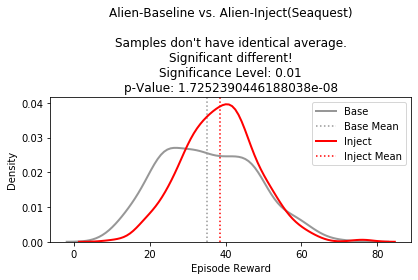

In [75]:
stataAlienMod = CalcStats(nameBase='Alien-Baseline',
                       nameInject='Alien-Inject(Seaquest)',
                       baseline_filepath=alien_base_filepath,
                       injection_filepath=alien_mod_inject_filepath,
                       threshold=0.01)
#meaning: model injection is significane better than baseline

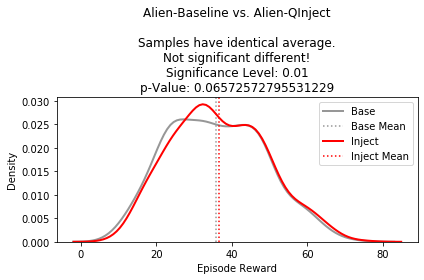

In [76]:
stataAlienQ = CalcStats(nameBase='Alien-Baseline',
                       nameInject='Alien-QInject',
                       baseline_filepath=alien_base_filepath,
                       injection_filepath=alien_q_inject_filepath,
                       threshold=0.01)
#meaning: not significant difference between q-inject and baseline

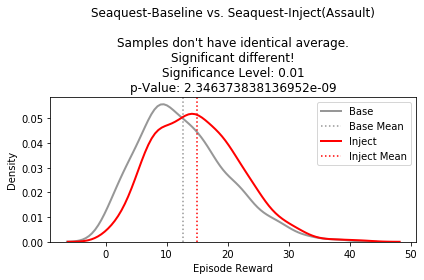

In [77]:
stataSeaquestMod = CalcStats(nameBase='Seaquest-Baseline',
                          nameInject='Seaquest-Inject(Assault)',
                          baseline_filepath=seaquest_base_filepath,
                          injection_filepath=seaquest_mod_inject_filepath,
                          threshold=0.01)
#meaning: model injection is significane better than baseline

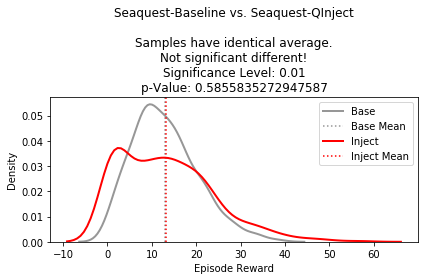

In [78]:
stataSeaquestQ = CalcStats(nameBase='Seaquest-Baseline',
                          nameInject='Seaquest-QInject',
                          baseline_filepath=seaquest_base_filepath,
                          injection_filepath=seaquest_q_inject_filepath,
                          threshold=0.01)
#meaning: not significant difference between q-inject and baseline

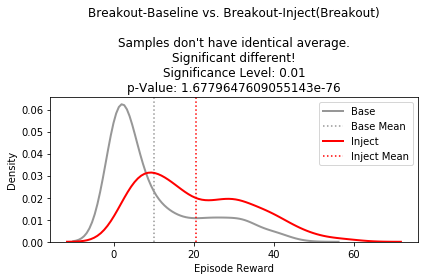

In [79]:
stataBreakoutMod = CalcStats(nameBase='Breakout-Baseline',
                          nameInject='Breakout-Inject(Breakout)',
                          baseline_filepath=breakout_base_filepath,
                          injection_filepath=breakout_mod_inject_filepath,
                          threshold=0.01)
#meaning: model injection is significane better than baseline

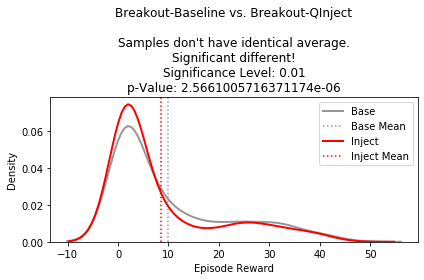

In [80]:
stataBreakoutQ = CalcStats(nameBase='Breakout-Baseline',
                          nameInject='Breakout-QInject',
                          baseline_filepath=breakout_base_filepath,
                          injection_filepath=breakout_q_inject_filepath,
                          threshold=0.01)
#meaning: q-injection is significant worse

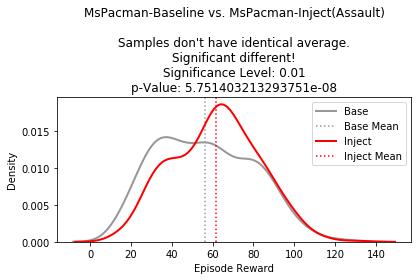

In [81]:
stataPacmanMod = CalcStats(nameBase='MsPacman-Baseline',
                        nameInject='MsPacman-Inject(Assault)',
                        baseline_filepath=pacman_base_filepath,
                        injection_filepath=pacman_mod_inject_filepath,
                        threshold=0.01)
#meaning: model-inject is significant better

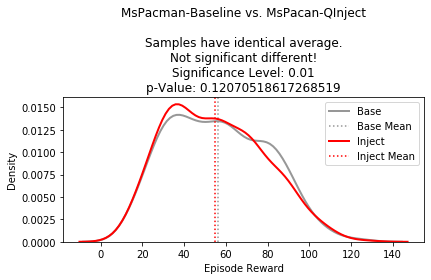

In [82]:
stataPacmanQ = CalcStats(nameBase='MsPacman-Baseline',
                        nameInject='MsPacan-QInject',
                        baseline_filepath=pacman_base_filepath,
                        injection_filepath=pacman_q_inject_filepath,
                        threshold=0.01)
#meaning: not significant difference between q-inject and baseline

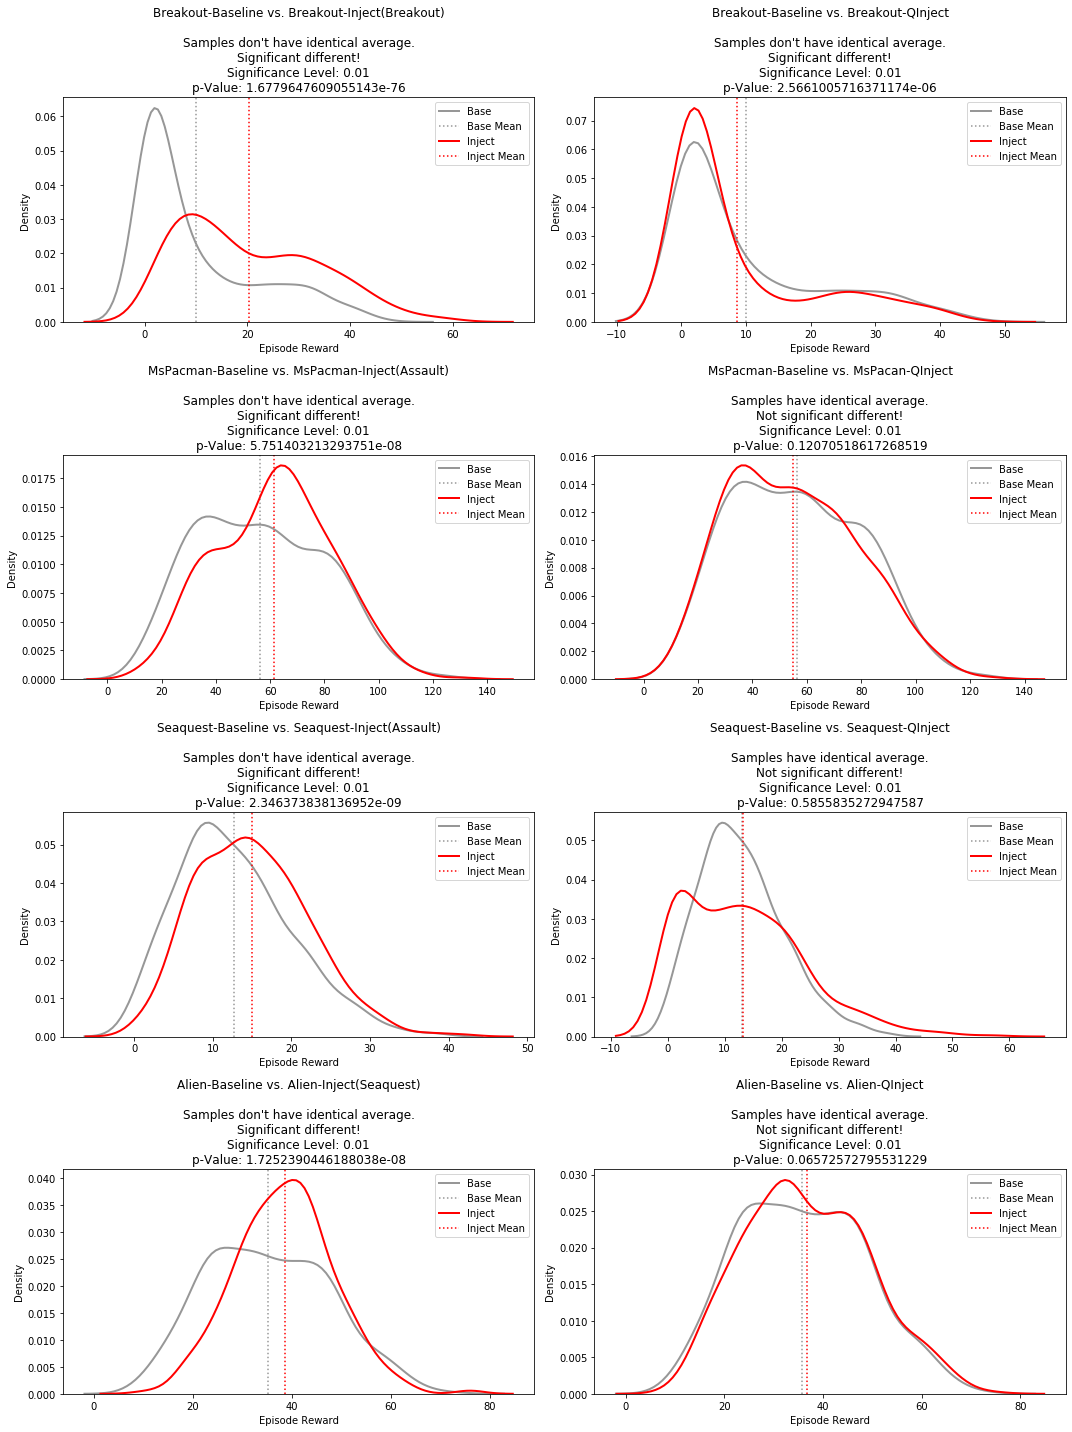

In [84]:
fig = plt.figure(figsize=(15,20))
grid = fig.add_gridspec(4,2)

ax1 = fig.add_subplot(grid[0,0])
ax1 = stataBreakoutMod.plotChart()

ax11 = fig.add_subplot(grid[0,1])
ax11 = stataBreakoutQ.plotChart()

ax2 = fig.add_subplot(grid[1,0])
ax2 = stataPacmanMod.plotChart()

ax22 = fig.add_subplot(grid[1,1])
ax22 = stataPacmanQ.plotChart()

ax3 = fig.add_subplot(grid[2,0])
ax3 = stataSeaquestMod.plotChart()

ax33 = fig.add_subplot(grid[2,1])
ax33 = stataSeaquestQ.plotChart()

ax4 = fig.add_subplot(grid[3,0])
ax4 = stataAlienMod.plotChart()

ax44 = fig.add_subplot(grid[3,1])
ax44 = stataAlienQ.plotChart()

plt.tight_layout()
plt.savefig('./t_test/tests.png')